In [1]:
from math import cos, exp, pi, tanh, sqrt
from scipy.integrate import quad, dblquad
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from core_defs import *

In [3]:
def relu(X):
   return np.maximum(0,X)

init_phi(relu)

In [4]:
acc_phi(-10)

0

In [5]:
def relu_analytic_length_conv(sigmaW, sigmaB, dropout):
    if sigmaW**2 > 2*dropout:
        return "Input lengths don't converge - qSS"
    if (sigmaW**2 == 2*dropout) and dropout == 0:
        return "All lengths converge - qSS"
    return (sigmaB**2)/(1-(sigmaW**2)/(2*dropout))

In [7]:
qSSnext(1, 1, 1, 5, integral_range = 10)

3.5000000000000004

In [8]:
qSSstar(1, 1, 1, 5, steps_till_convergence = 200)

2.0

In [10]:
relu_analytic_length_conv(1, 1, 1)



2.0

C:\Users\ssaro\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


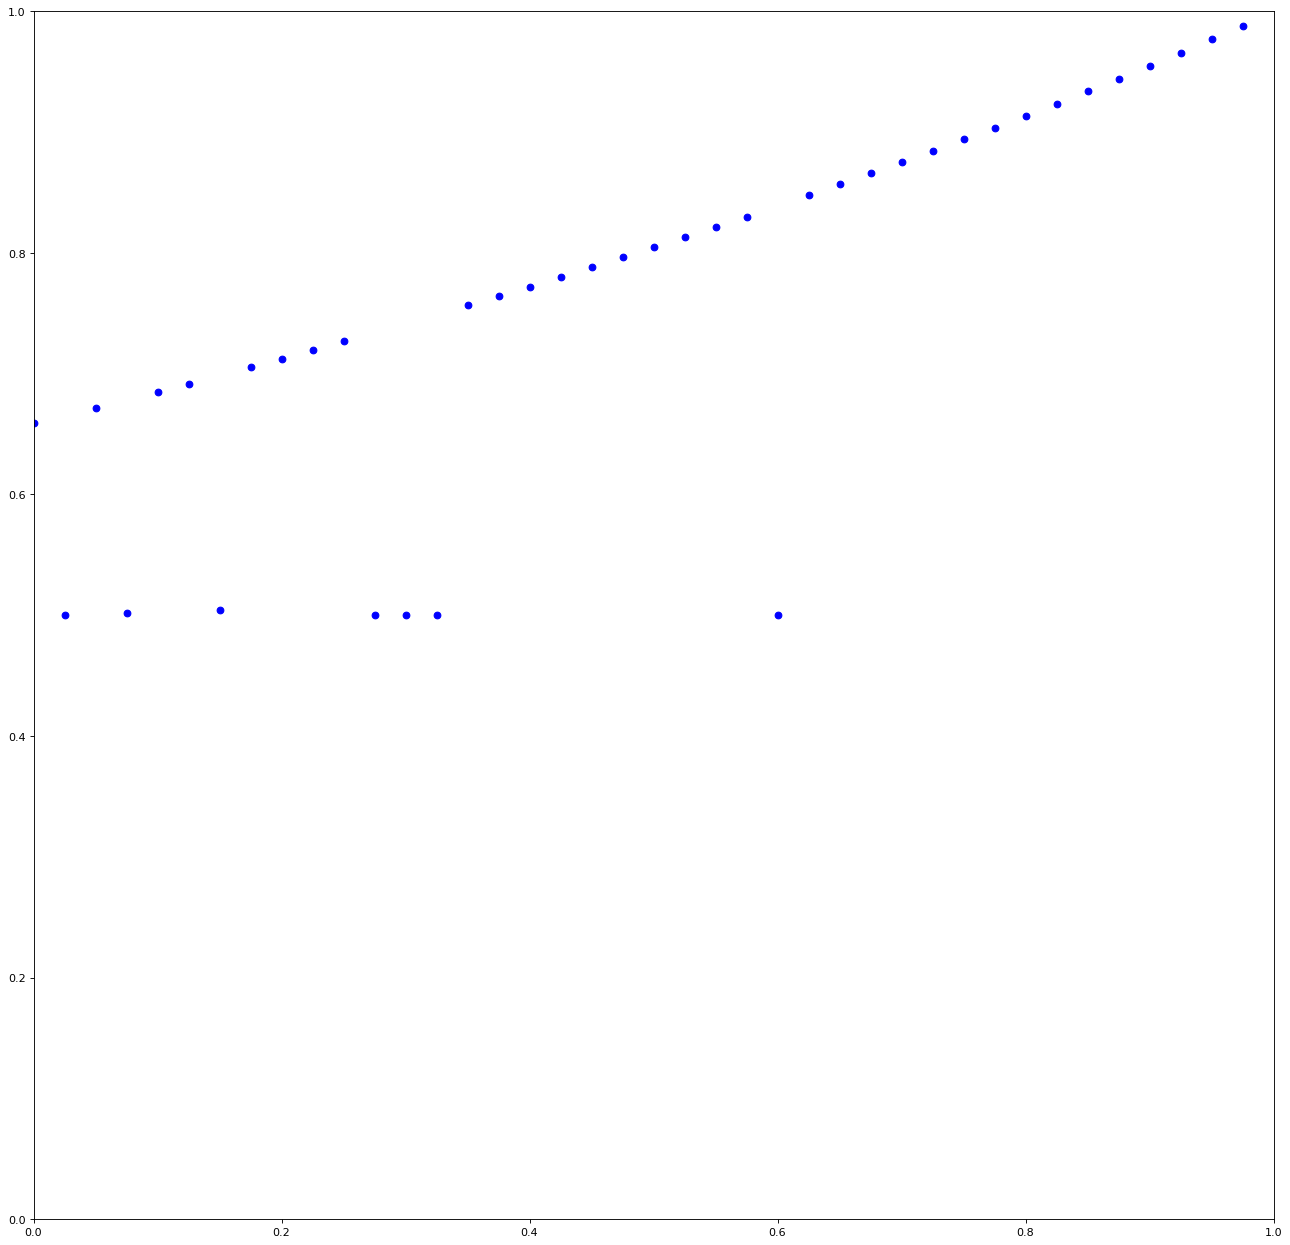

In [9]:
corr_map_plot(1, 1, 1, steps = 0.025)

In [10]:
temp_qSSstar = qSSstar(1, 1, 1, 5, steps_till_convergence = 500)
temp_qSSstar

2.0

In [11]:
prev_corr = 0.04
corr_map(1, 1, 1, prev_corr)

C:\Users\ssaro\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


0.5000050747118674

In [12]:
tempqAB_next = qAB_next(1, 1, 1, temp_qSSstar, prev_corr, integral_range = 10)
tempqAB_next

1.239401301858115

In [13]:
tempqAB_next/temp_qSSstar


0.6197006509290575

In [7]:
sigmaW = 1
sigmaB = 1
dropout = 1
temp_qSSstar = qSSstar(sigmaW, sigmaB, dropout, 5, steps_till_convergence = 500)
temp_qSSstar

2.0

C:\Users\ssaro\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


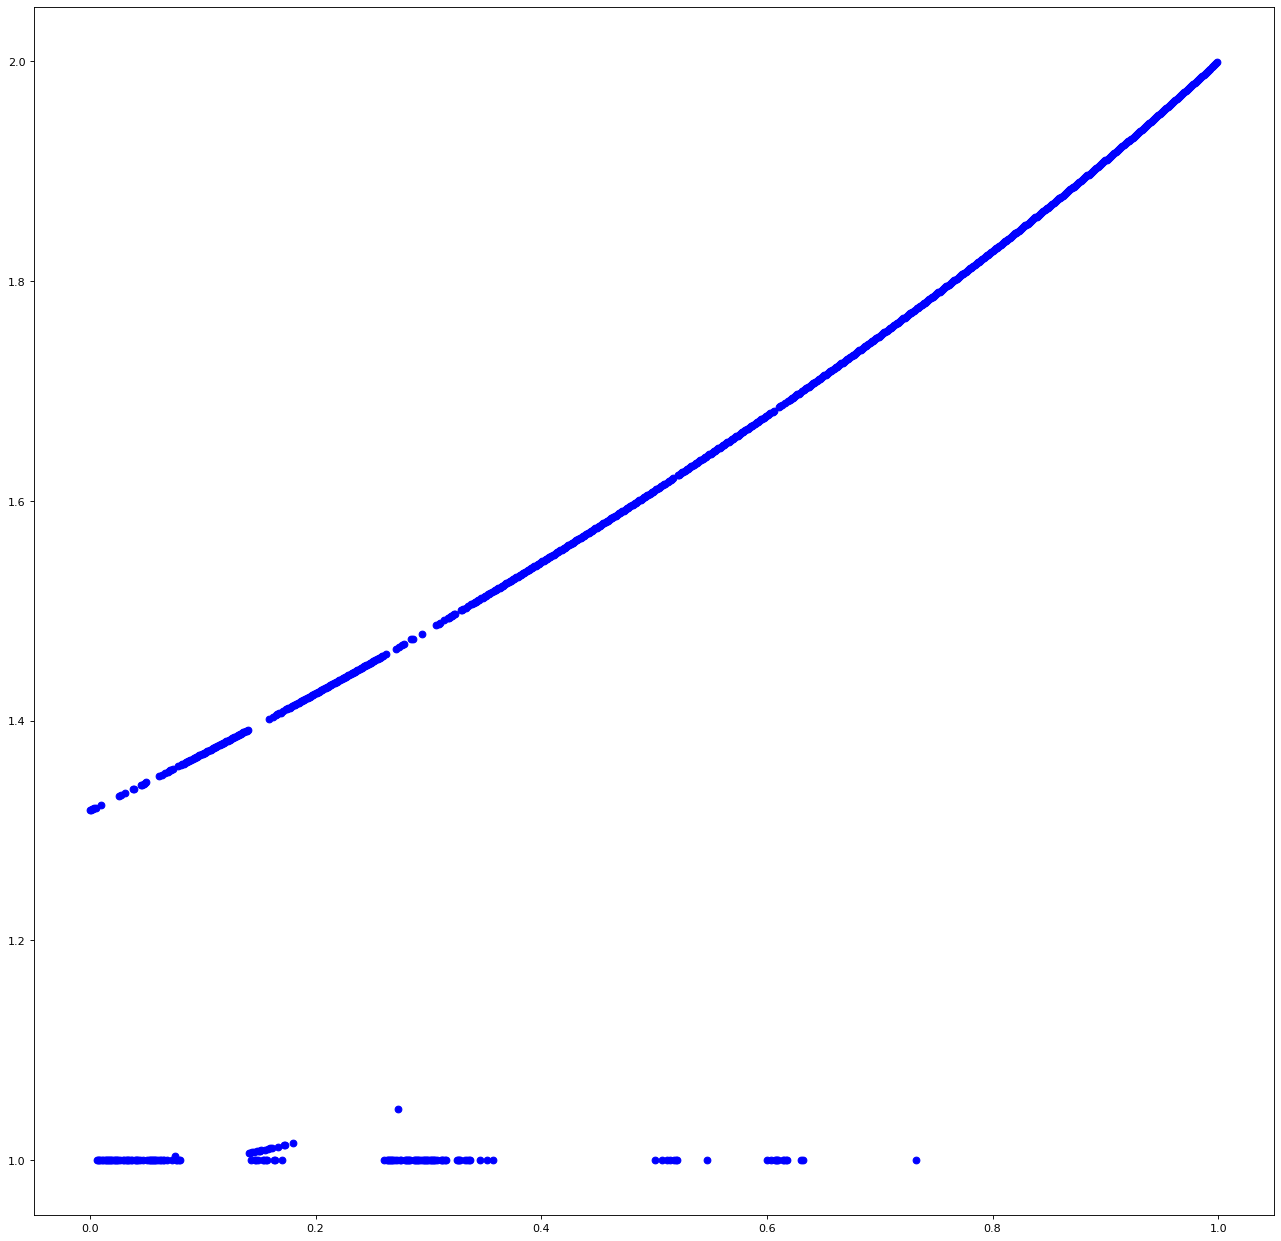

In [26]:
steps = 0.001
figure(figsize=(20, 20), dpi=80)
x = np.arange(0, 1, steps)

qAB_next_vec = np.vectorize(qAB_next, excluded=['sigmaW', 'sigmaB', 'qAA_prev', 'qBB_prev', 'integral_range'])
y = qAB_next_vec(sigmaW, sigmaB, temp_qSSstar, temp_qSSstar, x, integral_range = 10)

plt.plot (x, y, 'bo')
plt.show()

In [15]:
#def analytic_qAB_next(sigmaW, sigmaB, qSSstar, prev_corr):
#    return (sigmaW**2)*(1/2 * qSSstar * prev_corr + qSSstar * (1/(2*pi))*(1- prev_corr**2)**(3/2)) + sigmaB**2

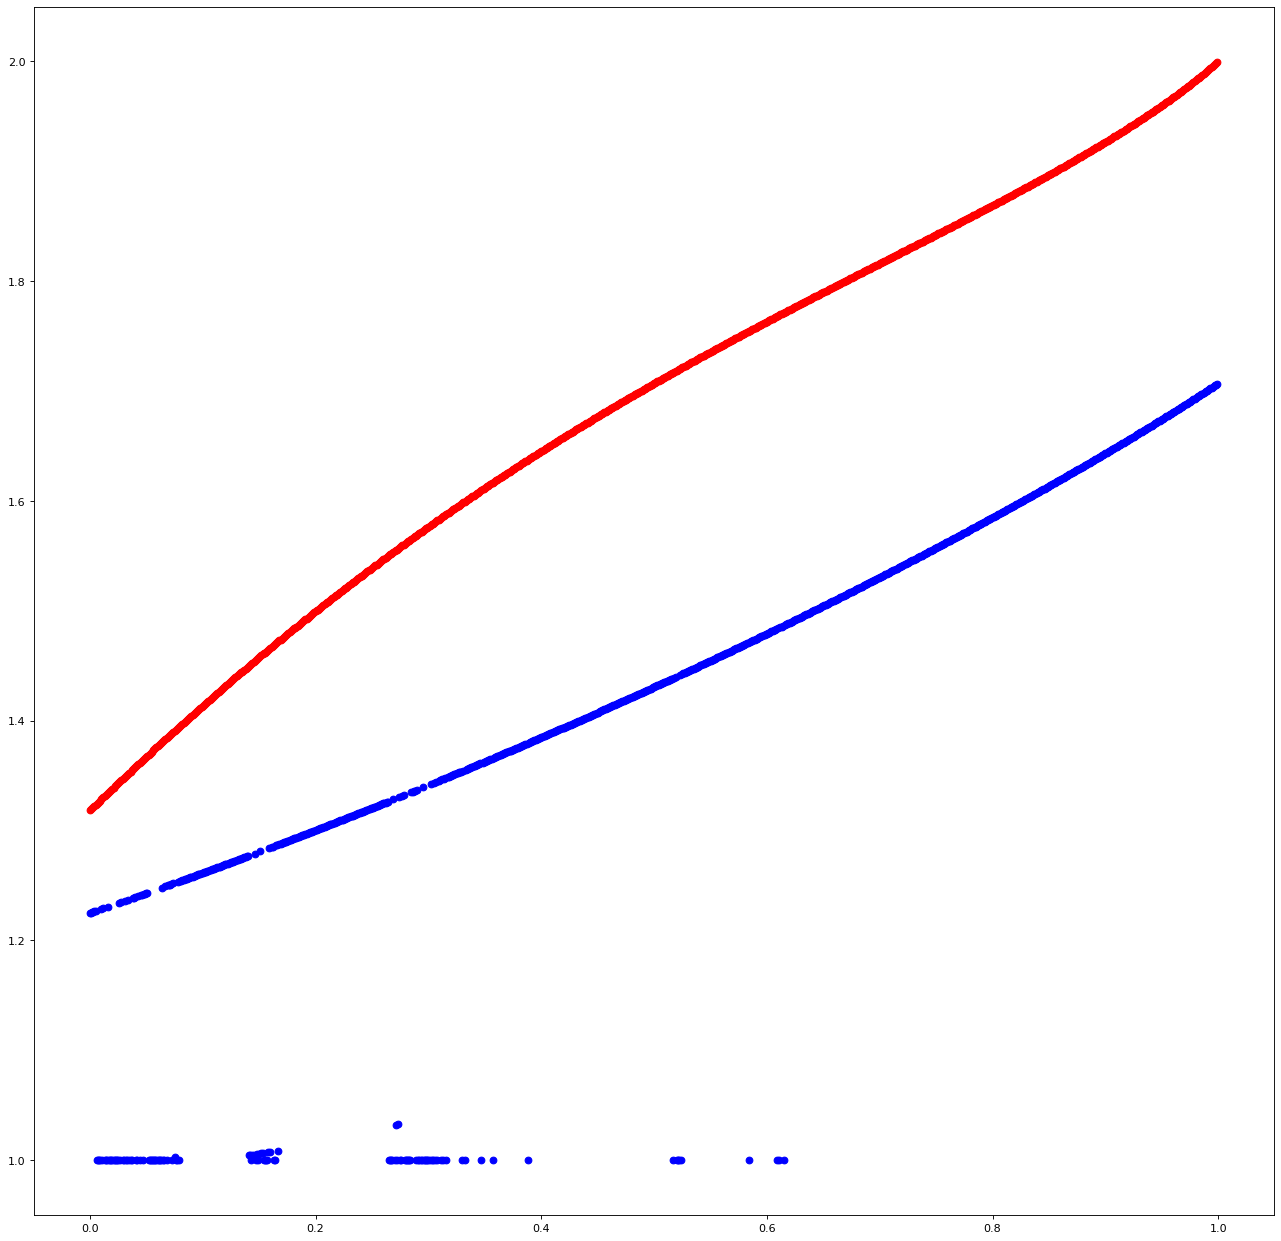

hello


In [19]:
analytic_qAB_next_vec = np.vectorize(analytic_qAB_next, excluded=['sigmaW', 'sigmaB', 'dropout', 'temp_qSSstar'])
figure(figsize=(20, 20), dpi=80)
x_an = np.arange(0, 1, steps)
y_an = analytic_qAB_next_vec(sigmaW, sigmaB, temp_qSSstar, x)

plt.plot (x, y, 'bo')
plt.plot (x_an, y_an, 'bo', c="red")
plt.show()
print("hello")

In [37]:
c = 0.5
def func_to_int(x, y):
    return normDist(x)*normDist(y)* x * y

f = lambda x, y: func_to_int(x, y)
from scipy import integrate
integrate.dblquad(f, 0, 100, lambda x: (c*x)/sqrt(1-c**2), 100)[0]

0.11936620731829158

In [45]:
(1 - c**2)/(2*pi)

0.1193662073189215

In [42]:
c = 0.5
def func_to_int(x):
    return normDist(-c*x/(sqrt(1-c**2))) * x * normDist(x)

f = lambda x: func_to_int(x)
from scipy import integrate
integrate.quad(f, 0, 100,)[0]

0.11936620731892153

In [43]:
c = 0.5
(1-c**2)/(2*pi)


0.1193662073189215

In [20]:
def old_analytic_qAB_next(sigmaW, sigmaB, qSSstar, prev_corr):
    #turns out this was wrong

    def triangle(q, c):
        return q*c*(1+c)/(2*sqrt(2*pi))

    def circle(q, c):
        return q * sqrt(1-c**2) * (1-c**2)/(2*pi)

    return (sigmaW**2)*(triangle(qSSstar, prev_corr) + circle(qSSstar, prev_corr)) + (sigmaB**2)


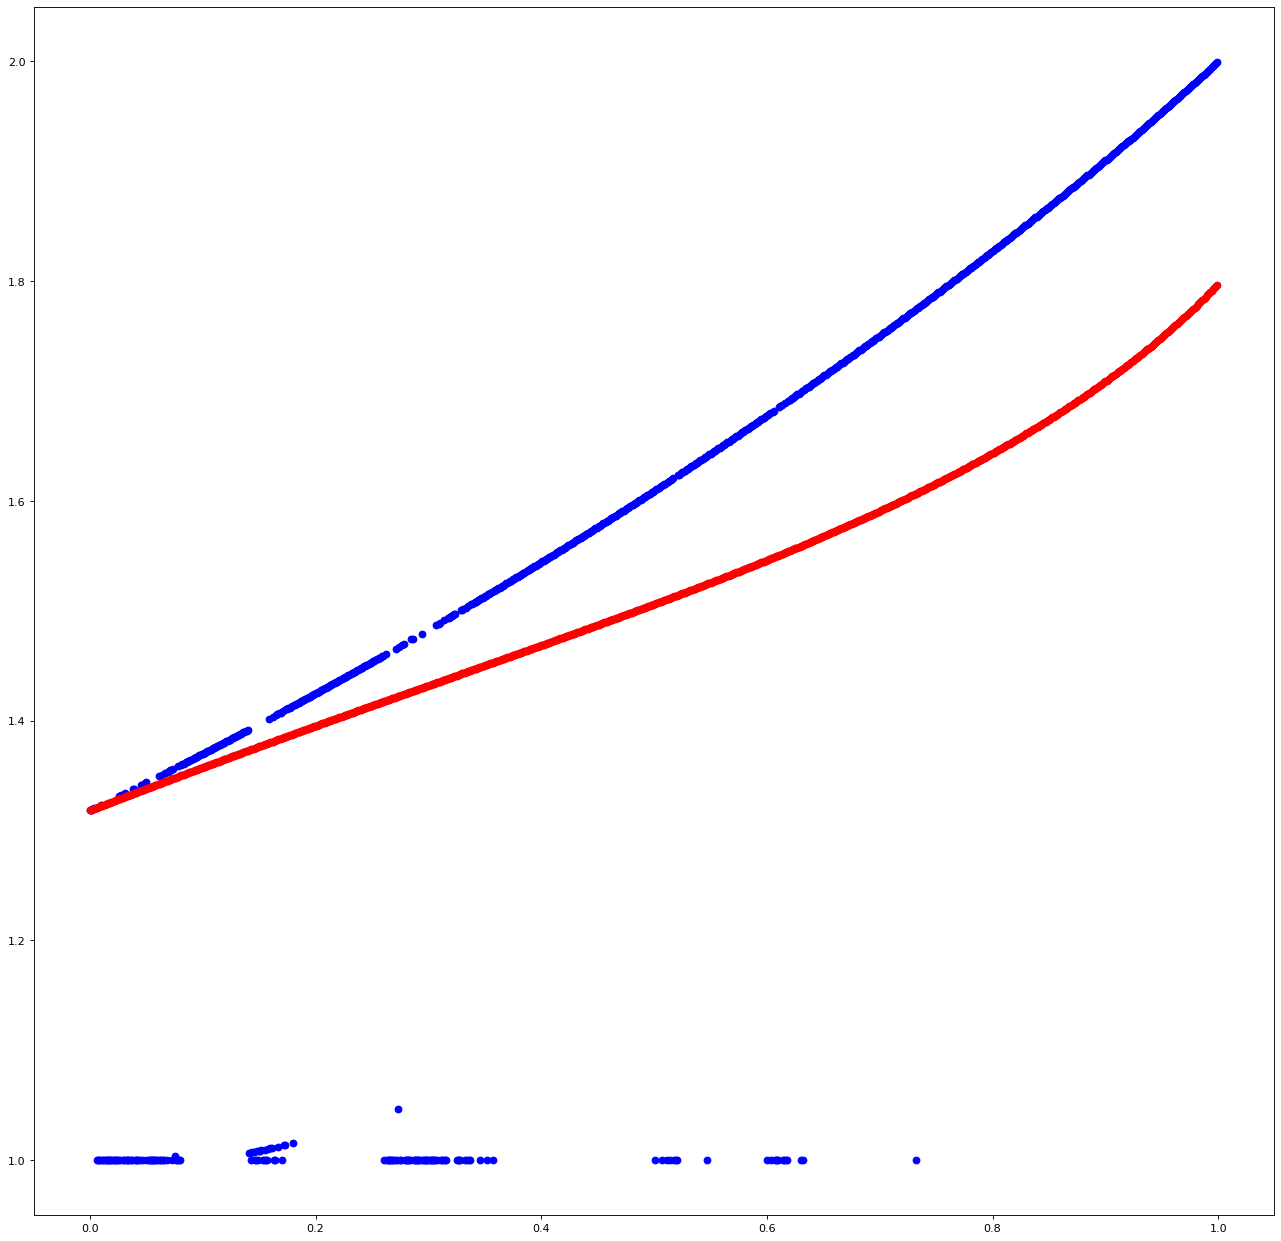

hello


In [14]:
analytic_qAB_next_vec = np.vectorize(analytic_qAB_next, excluded=['sigmaW', 'sigmaB', 'dropout', 'temp_qSSstar'])
figure(figsize=(20, 20), dpi=80)
x_an = np.arange(0, 1, steps)
y_an = analytic_qAB_next_vec(sigmaW, sigmaB, temp_qSSstar, x)

plt.plot (x, y, 'bo')
plt.plot (x_an, y_an, 'bo', c="red")
plt.show()
print("hello")

In [53]:
print("hello")

hello


In [8]:
sigmaW = 1
sigmaB = 1
dropout = 1
temp_qSSstar = qSSstar(sigmaW, sigmaB, dropout, 5, steps_till_convergence = 500)
temp_qSSstar

2.0

In [14]:
def qAB_next_temp(sigmaW, sigmaB, qAA_prev, qBB_prev, corr_prev, integral_range = 10):
    #this is for calculating the joint correlation
    #we dont have to assume the vector lengths qAA qBB have reached their limit -
    # but turns out that we will actually just input the limited qSSstar to make our results input independent
    # intergral range set at 10, cus we use normal distribution measure, and that gives us 3 s.d
    def u1(z1):
        return sqrt(qAA_prev)*z1

    def u2(z1, z2):
        return sqrt(qBB_prev)*(corr_prev*z1 + sqrt(1- corr_prev**2)*z2)

    def f(z1, z2):
        #maybe should get rid of this try except thing
        try:
            return relu(u1(z1))*relu(u2(z1, z2))*normDist(z1)*normDist(z2)
        except:
            print("something up went wrong")

    intergral = dblquad(f, -integral_range, integral_range, -integral_range, integral_range)
    print(intergral)

    return (sigmaW**2) * intergral[0] + (sigmaB**2)

In [15]:
qAB_next_temp(sigmaW, sigmaB, temp_qSSstar, temp_qSSstar, 0.8)

(0.8271197205845456, 1.4853891673961706e-08)


1.8271197205845455

In [19]:
analytic_qAB_next(sigmaW, sigmaB, temp_qSSstar, 0.8)

0.6432318191937619


1.8271190000000002

In [22]:
sigmaW = 1
sigmaB = 1
dropout = 1
temp_qSSstar = qSSstar(sigmaW, sigmaB, dropout, 5, steps_till_convergence = 500)
temp_qSSstar

def analytic_qAB_next(sigmaW, sigmaB, qSSstar, prev_corr):
    #turns out this was wrong

    def integral_part(q, c):
        if q<0:
            print("something up, qSSstar <0")
            return 0

        if c==1:
            return q/2

        if c>0 and c<1:
            return (1/(2*pi))*q*(sqrt(1-c**2) + c*pi + 1j*c*np.arccosh(c+0j))
        elif c<=0 and c>-1:
            return (1/(4*pi))*q*(2*sqrt(1-c**2) + c*pi + 2*c*np.arcsin(c))

    return (sigmaW**2)*np.real(integral_part(qSSstar, prev_corr)) + (sigmaB**2)


In [24]:
analytic_qAB_next_vec = np.vectorize(analytic_qAB_next, excluded=['sigmaW', 'sigmaB', 'qSSstar'])
figure(figsize=(20, 20), dpi=80)
steps = 0.01
x_an = np.arange(0.001, 1, steps)
y_an = analytic_qAB_next_vec(sigmaW, sigmaB, temp_qSSstar, x_an)

(0.8271197199509674+0j)
2.0 0.001
(0.8271197199509674+0j)
2.0 0.001
(0.8271197199509674+0j)
2.0 0.011
(0.8271197199509674+0j)
2.0 0.020999999999999998
(0.8271197199509674+0j)
2.0 0.030999999999999996
(0.8271197199509674+0j)
2.0 0.040999999999999995
(0.8271197199509674+0j)
2.0 0.05099999999999999
(0.8271197199509674+0j)
2.0 0.06099999999999999
(0.8271197199509674+0j)
2.0 0.071
(0.8271197199509674+0j)
2.0 0.08099999999999999
(0.8271197199509674+0j)
2.0 0.09099999999999998
(0.8271197199509674+0j)
2.0 0.10099999999999998
(0.8271197199509674+0j)
2.0 0.11099999999999999
(0.8271197199509674+0j)
2.0 0.12099999999999998
(0.8271197199509674+0j)
2.0 0.13099999999999998
(0.8271197199509674+0j)
2.0 0.141
(0.8271197199509674+0j)
2.0 0.15099999999999997
(0.8271197199509674+0j)
2.0 0.16099999999999998
(0.8271197199509674+0j)
2.0 0.17099999999999999
(0.8271197199509674+0j)
2.0 0.18099999999999997
(0.8271197199509674+0j)
2.0 0.19099999999999998
(0.8271197199509674+0j)
2.0 0.20099999999999996
(0.82711971

<Figure size 1600x1600 with 0 Axes>

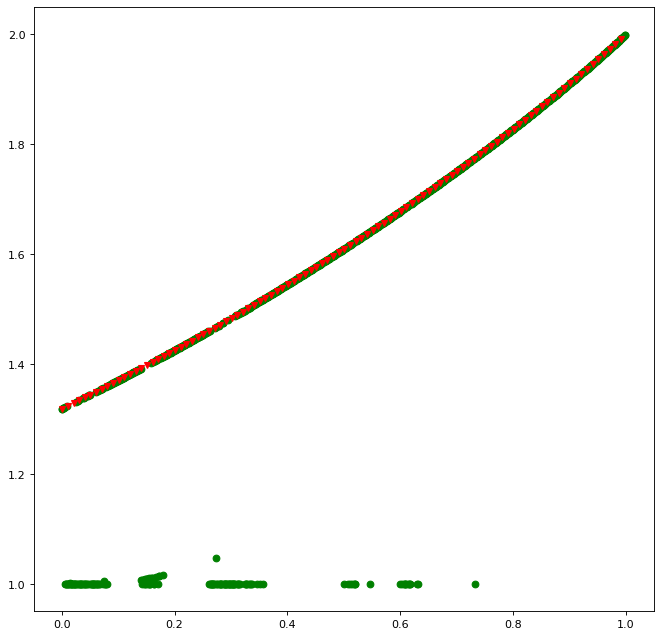

hello


In [33]:
figure(figsize=(10, 10), dpi=80)
plt.plot (x, y, 'bo', c="green")
plt.plot (x_an, y_an, "v", c="red")
plt.savefig("num err and analytic Relu qAB")
plt.show()
print("hello")

In [11]:
analytic_qAB_next(sigmaW, sigmaB, temp_qSSstar, 0.8)

1.8271197199509674

In [23]:
np.arccosh([0.8 + 0j])

array([0.+0.64350111j])